# Netflix Movies and TV shows

### 1. Importing Libraries;
### 2. Importing Data;
### 3. Exploring relationships;
### 4. Creating a correlation matrix heatmap;
#### 4.1 Discuss what the coefficients in the plot mean in terms of the relationships between the variables;
### 5. Creating a scatterplot (or plots) for the variables with the strongest correlations;
#### 5.1  Examine the nature of their relationships;
### 6. Creating a pair plot of the entire data set;
#### 6.1 Comment on the distribution of the variables and mark variables to be explored further with an explanation of why;
### 7. Creating a categorical plot and interpreting the results;
### 8. Adding new questions;
### 9. Defining hypotheses;

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Checking matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# Ensuring that charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# 2. Importing data

In [4]:
# Defining a path
path = r'C:\Users\franc\Documents\Netflix Movies and tv shows'

In [5]:
# Importing the dataset
df_netflix = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'netflix.pkl'))

In [6]:
# Checking the dataset
df_netflix.head(5)

,id,title,type,release_year,lenght,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,country,imdb_score_level,tmdb_score_level
0,ts300399,Five Came Back: The Reference Films,show,1945,51,documentation,US,1,NaN,0,0.600000,NaN,documentation,US,NaN,NaN
1,tm82169,Rocky,movie,1976,119,"drama, sport",US,0,8.1,588100,106.400002,7.8,drama,US,NaN,High score
2,tm17823,Grease,movie,1978,110,"romance, comedy",US,0,7.2,283316,33.200001,7.4,romance,US,High score,High score
3,tm191099,The Sting,movie,1973,129,"crime, drama, comedy, music",US,0,8.3,266738,24.600000,8.0,crime,US,NaN,High score
4,tm69975,Rocky II,movie,1979,119,"drama, sport",US,0,7.3,216307,75.699997,7.2,drama,US,High score,High score


# 3. Exploring relationships

In [7]:
# Creating a correlation matrix using pandas
df_netflix.corr()

,release_year,lenght,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.158581,-0.156173,-0.127553,-0.178028,-0.000870,-0.042676
lenght,-0.158581,1.000000,-0.413218,-0.167882,0.130755,-0.042731,-0.170596
seasons,-0.156173,-0.413218,1.000000,0.212044,0.064434,0.256164,0.202984
imdb_score,-0.127553,-0.167882,0.212044,1.000000,0.174510,0.072723,0.533271
imdb_votes,-0.178028,0.130755,0.064434,0.174510,1.000000,0.273376,0.129660
tmdb_popularity,-0.000870,-0.042731,0.256164,0.072723,0.273376,1.000000,0.163356
tmdb_score,-0.042676,-0.170596,0.202984,0.533271,0.129660,0.163356,1.000000


# 4. Creating a correlation matrix heatmap

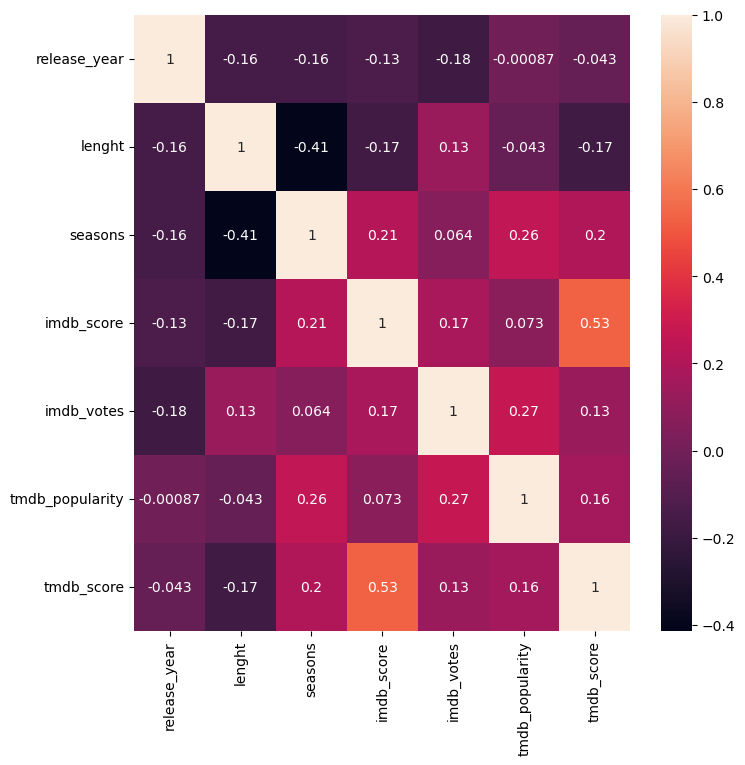

In [8]:
# Creating a subplot using matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix
corr = sns.heatmap(df_netflix.corr(), annot = True, ax = ax) 

### 4.1 Discuss what the coefficients in the plot mean in terms of the relationships between the variables

As we can notice from the visualization above, there are mostly very week correlations, negative correlations or no correlations at all. 
The only positive correlaction seems to be between idmb score and tmdb score.

# 5. Creating a scatterplot (or plots) for the variables with the strongest correlations

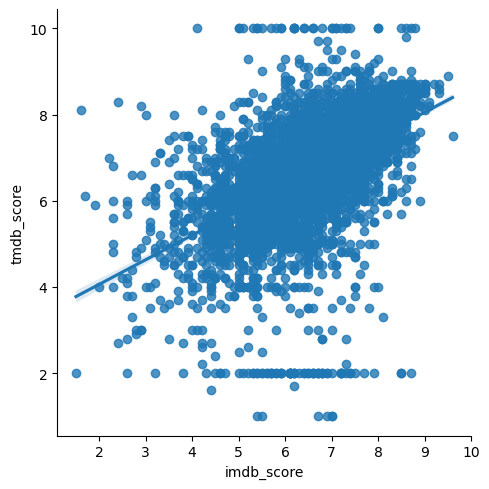

In [9]:
# Creating a scatterplot for the "imdb_score" and "tmdb_score" columns in seaborn
sns.lmplot(x = 'imdb_score', y = 'tmdb_score', data = df_netflix) 

### 5.1 Examine the nature of their relationships

The scatterplot shows that tmdb_score and imdb_score have a positive correlation. We can see a linear increasing trend with some outliers. As a result, the imbd score increases in proportion to the tmdb_score.

# 6 Creating a pair plot of the entire data set

In [10]:
# Keeping only the variables you want to use in the pair plot
sub_netflix= df_netflix[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'imdb_votes','lenght','seasons']]

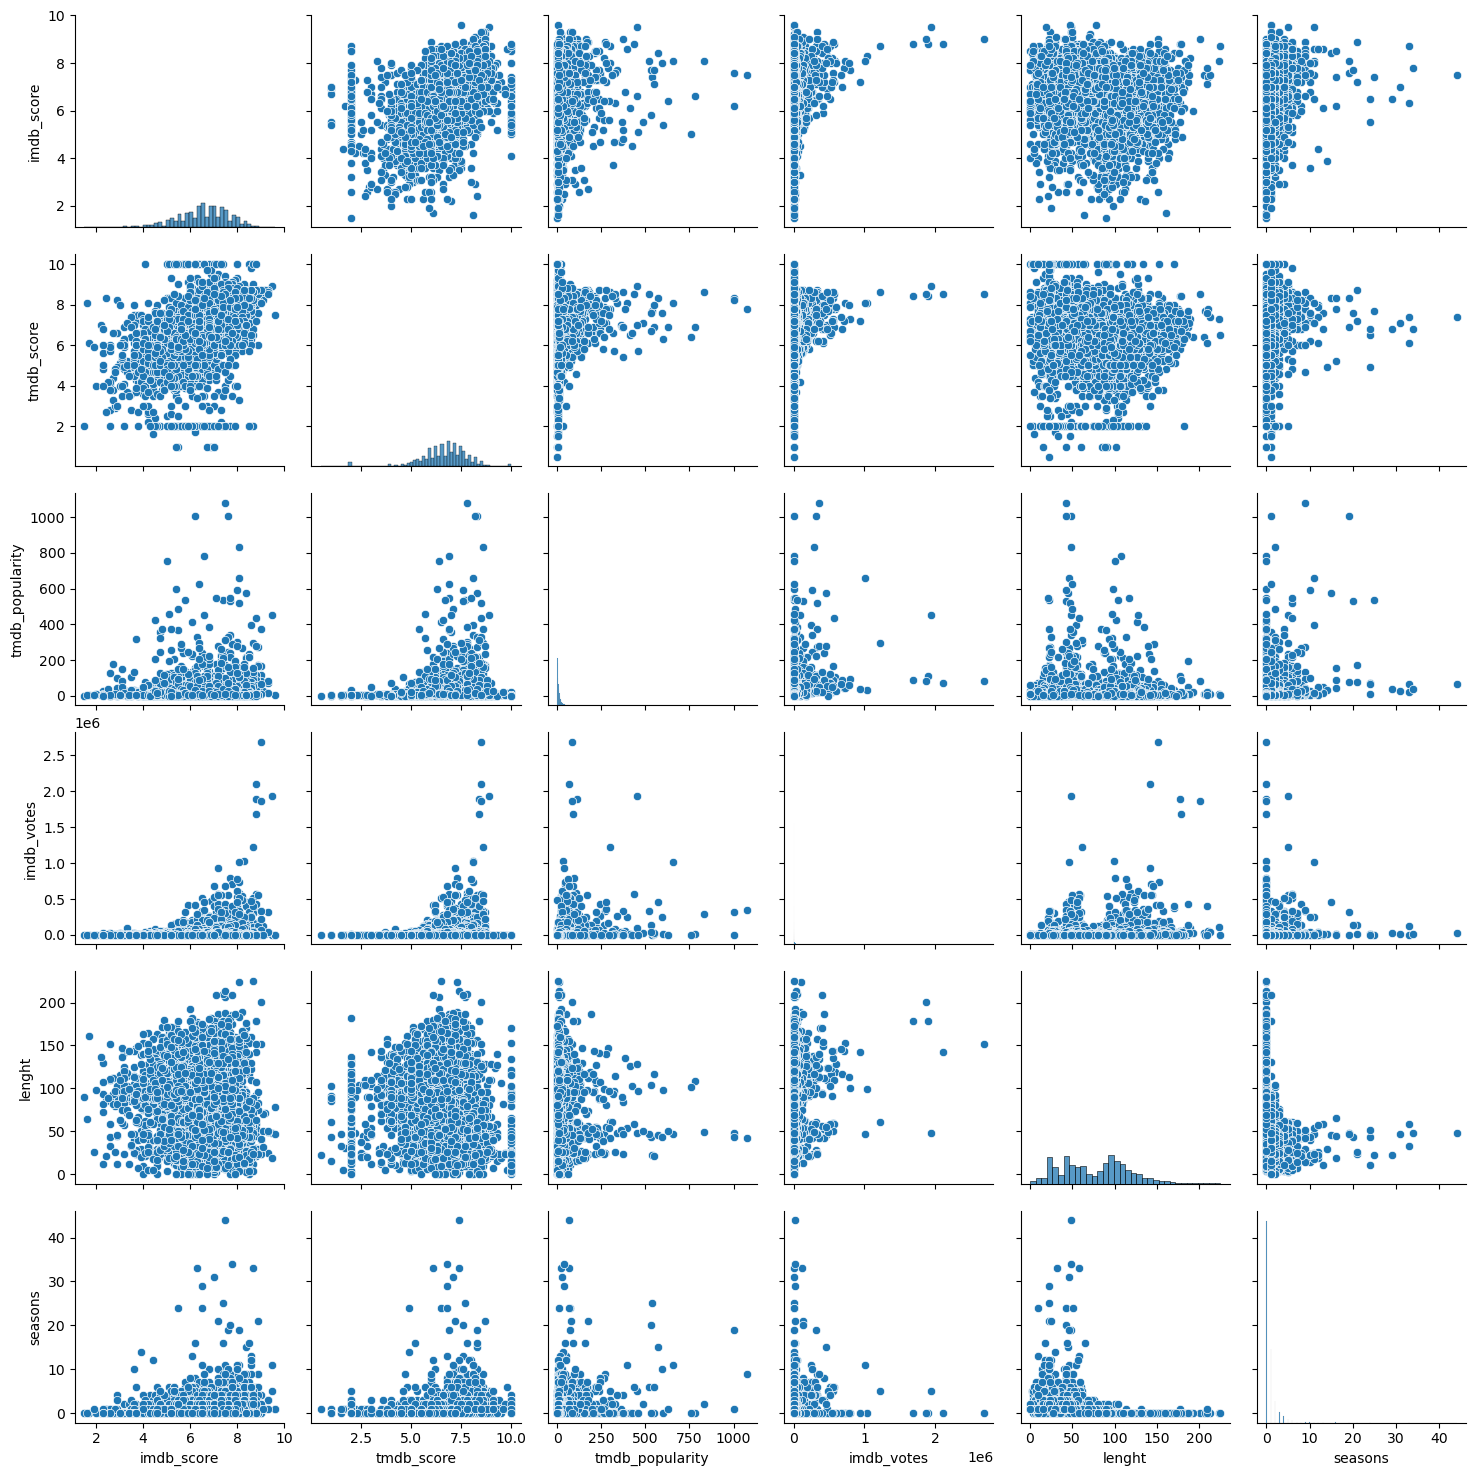

In [11]:
# Creating a pair plot 
g = sns.pairplot(sub_netflix)

In [12]:
# Exporting the visualization created
g.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'pairplot.png')))

### 6.1 Comment on the distribution of the variables and mark variables to be explored further with an explanation of why

I'd want to go deeper into the variables imdb_score, tmdb_score, tmdb_popularity, and imdb_votes. Even if the relationships are weak or at the best medium, I would like to investigate further the elements that affect a movie's or tv show's success (such as runtime, number of seasons,votes, popularity, scores, etc.)

# 7. Creating a categorical plot and interpreting the results

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

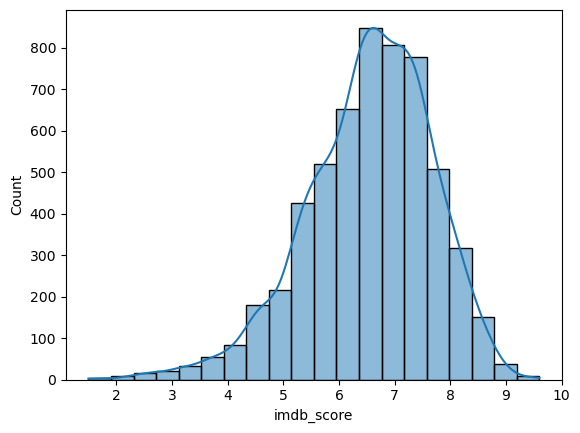

In [13]:
# Using a histogram to visualize the distribution of the variables.

sns.histplot(df_netflix['imdb_score'], bins = 20, kde = True)

<AxesSubplot:xlabel='tmdb_score', ylabel='Count'>

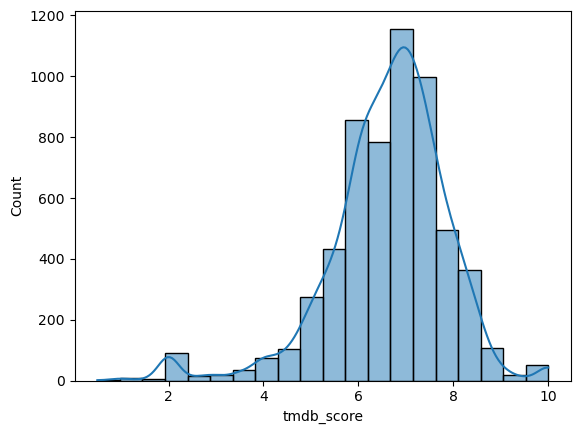

In [14]:
# Using a second  histogram to visualize the distribution of the variables.

sns.histplot(df_netflix['tmdb_score'], bins = 20, kde = True)

In [15]:
# Creating a new column called "imdb_score_level
df_netflix.loc[df_netflix['imdb_score'] < 6, 'imdb_score_level'] = 'Low score'
df_netflix.loc[(df_netflix['imdb_score'] >= 6) & (df_netflix['imdb_score'] <= 8), 'imdb_score_level'] = 'High score'
df_netflix.loc[df_netflix['imdb_score'] >= 9, 'imdb_score_level'] = 'Excellent score'

In [16]:
df_netflix['imdb_score_level'].value_counts(dropna = False)

High score         3685
Low score          1559
NaN                 874
Excellent score      19
Name: imdb_score_level, dtype: int64

In [17]:
# Creating a new column called "tmdb_score_level"
df_netflix.loc[df_netflix['tmdb_score'] < 6, 'tmdb_score_level'] = 'Low score'
df_netflix.loc[(df_netflix['tmdb_score'] >= 6) & (df_netflix['tmdb_score'] <= 8), 'tmdb_score_level'] = 'High score'
df_netflix.loc[df_netflix['tmdb_score'] >= 9, 'tmdb_score_level'] = 'Excellent score'

In [18]:
df_netflix['tmdb_score_level'].value_counts(dropna = False)

High score         4033
Low score          1310
NaN                 710
Excellent score      84
Name: tmdb_score_level, dtype: int64

In [19]:
df_netflix.columns

Index(['id', 'title', 'type', 'release_year', 'lenght', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'genre', 'country', 'imdb_score_level',
       'tmdb_score_level'],
      dtype='object')

In [20]:
# Reducing the memory usage to avoid memory issues
for column in df_netflix:
 if df_netflix[column].dtype == 'float64':
     df_netflix[column]=pd.to_numeric(df_netflix[column], downcast='float')
 if df_netflix[column].dtype == 'int64':
     df_netflix[column]=pd.to_numeric(df_netflix[column], downcast='integer')

In [21]:
# Changing a variable to a suitable format
df_netflix['imdb_score_level'] = df_netflix['imdb_score_level'].astype('category')

In [22]:
df_netflix['tmdb_score_level'] = df_netflix['tmdb_score_level'].astype('category')

In [23]:
# Checking the result
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    6137 non-null   object  
 1   title                 6137 non-null   object  
 2   type                  6137 non-null   object  
 3   release_year          6137 non-null   int16   
 4   lenght                6137 non-null   int16   
 5   genres                6137 non-null   object  
 6   production_countries  6137 non-null   object  
 7   seasons               6137 non-null   int32   
 8   imdb_score            5669 non-null   float32 
 9   imdb_votes            6137 non-null   int32   
 10  tmdb_popularity       6061 non-null   float32 
 11  tmdb_score            5885 non-null   float32 
 12  genre                 6137 non-null   object  
 13  country               6137 non-null   object  
 14  imdb_score_level      5263 non-null   category
 15  tmdb

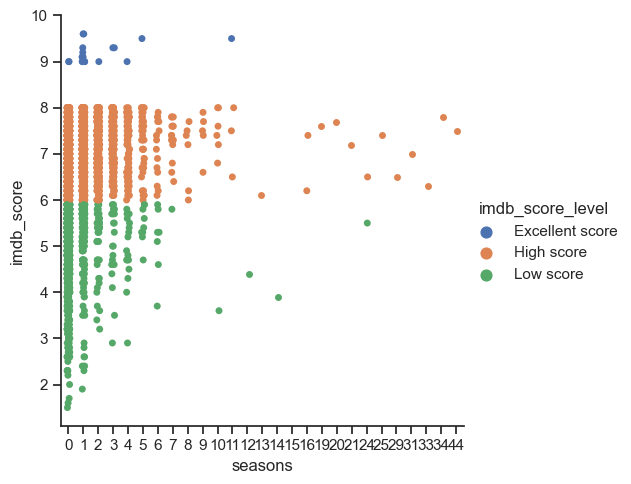

In [24]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
Imdb_score_levels = sns.catplot(x="seasons", y="imdb_score", hue="imdb_score_level", data=df_netflix)

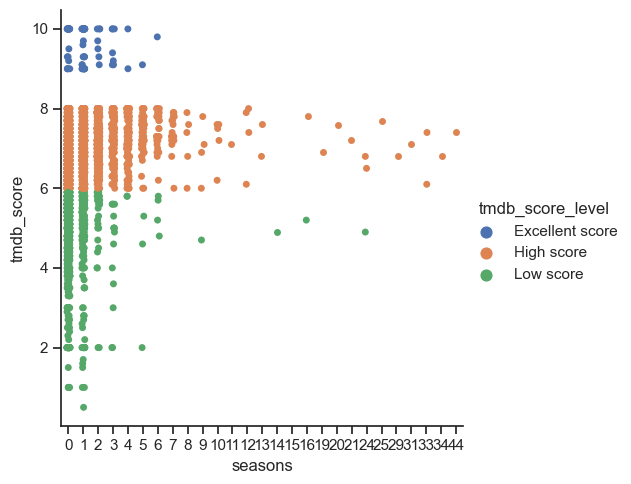

In [25]:
sns.set(style="ticks")
tmdb_score_levels = sns.catplot(x="seasons", y="tmdb_score", hue="tmdb_score_level", data=df_netflix)

As we can see from the visualizations above, the highest rated TV shows/movies have from 0 (for movies) to 4 seasons. These results suggest that tv shows with more than 8 series generally represent outliers.

In [26]:
# Exporting the visualizations created
Imdb_score_levels.savefig((os.path.join(path, 'Analysis','Visualizations', 'imdb_score.png')))

In [27]:
tmdb_score_levels.savefig((os.path.join(path, 'Analysis','Visualizations','tmdb_score.png')))

In [28]:
# Exporting data to pkl
df_netflix.to_pickle(os.path.join(path, 'Data','Prepared Data', 'netflix.pkl'))

# 8.  Revising the questions previously generated and adding new ones

### a) Answering the questions from the brief

#### 1)	Which titles have the highest ratings on IMDB?
#### 2)	Which titles garnered the most votes on IMDB?
#### 3)	What are top highest rated titles on TMBD?
#### 4)	What are the most popular titles on TMBD?

I'm still unable to respond because I haven't yet investigated the most popular and highly rated titles. However, I can tell that the highest rated movies and TV series have somewhere from 0 (for movies) and 4 seasons. TV shows with more than 7-8 seasons can be mostly considered outliers.

In [29]:
# Group the DataFrame by title and calculate the mean
title_ratings = df_netflix.groupby("title")["imdb_score"].mean()

# Sort the values in descending order and select the top 10
top10_titles_IMDB = title_ratings.sort_values(ascending=False)[:10]

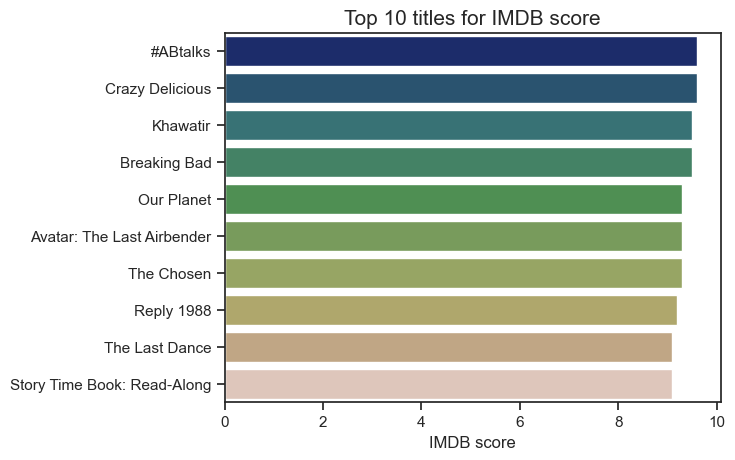

In [30]:
top10_titles_IMDB = sns.barplot(x=top10_titles_IMDB.values, y=top10_titles_IMDB.index, palette= 'gist_earth')
plt.xlabel("IMDB score")
plt.ylabel("")
plt.title("Top 10 titles for IMDB score", fontsize = '15')
plt.show()

In [31]:
# Exporting the visualization created
top10_titles_IMDB.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top10_titles_IMDB.png')))

In [32]:
# Group the DataFrame by title and calculate the mean 
title_votes = df_netflix.groupby("title")["imdb_votes"].mean()

# Sort the values in descending order and select the top 10
top10_titles_votes = title_votes.sort_values(ascending=False)[:10]

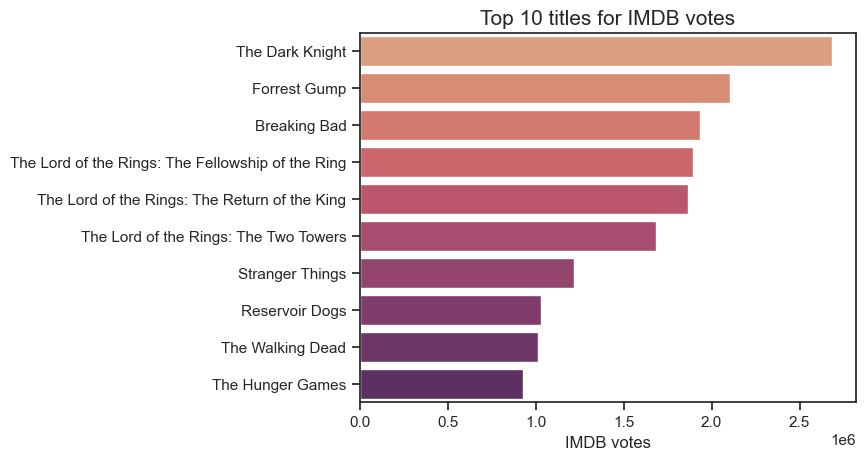

In [33]:
top10_titles_votes = sns.barplot(x=top10_titles_votes.values, y=top10_titles_votes.index, palette= 'flare')
plt.xlabel("IMDB votes")
plt.ylabel("")
plt.title("Top 10 titles for IMDB votes", fontsize = '15')
plt.show()

In [34]:
# Exporting the visualization created
top10_titles_votes.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top10_titles_votes.png')))

In [35]:
# Group the DataFrame by title and calculate the mean
title_TMDB = df_netflix.groupby("title")["tmdb_score"].mean()

# Sort the values in descending order and select the top 10
top10_titles_TMDB = title_TMDB.sort_values(ascending=False)[:10]

C:\Users\franc\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


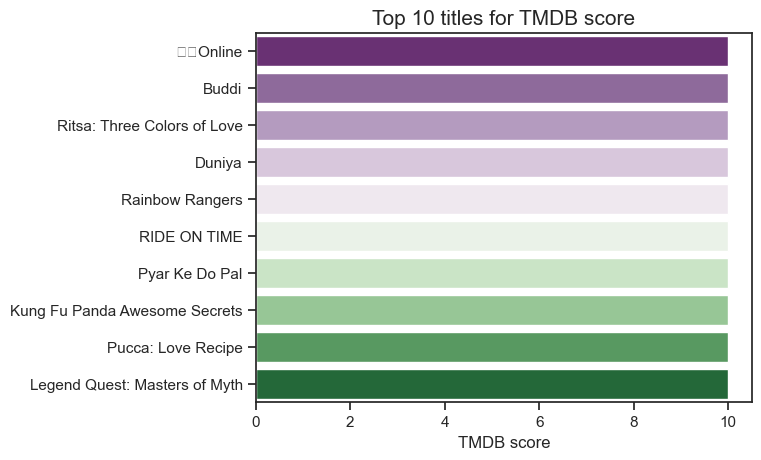

In [36]:
top10_titles_TMDB = sns.barplot(x=top10_titles_TMDB.values, y=top10_titles_TMDB.index, palette= 'PRGn')
plt.xlabel("TMDB score")
plt.ylabel("")
plt.title("Top 10 titles for TMDB score", fontsize = '15')
plt.show()

In [37]:
# Exporting the visualization created
top10_titles_TMDB.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top10_titles_TMDB.png')))

C:\Users\franc\AppData\Local\Temp\ipykernel_14356\194046615.py:2: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.
  top10_titles_TMDB.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top10_titles_TMDB.png')))


In [38]:
# Group the DataFrame by title and calculate the mean 
title_popularity = df_netflix.groupby("title")["tmdb_popularity"].mean()

# Sort the values in descending order and select the top 10
top10_titles_popularity = title_popularity.sort_values(ascending=False)[:10]

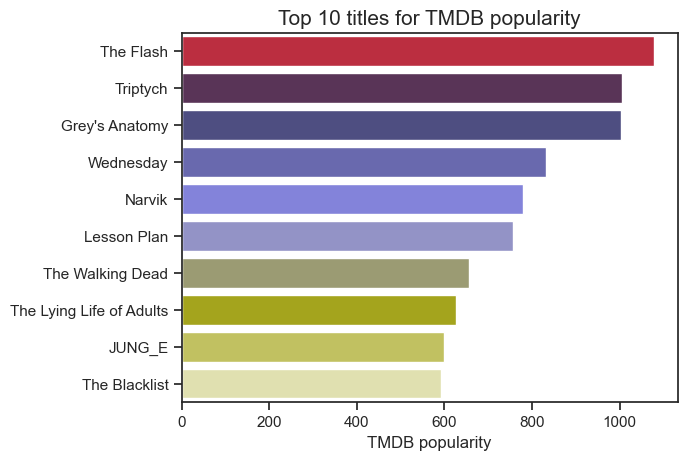

In [39]:
top10_titles_popularity = sns.barplot(x=top10_titles_popularity.values, y=top10_titles_popularity.index, palette= 'gist_stern')
plt.xlabel("TMDB popularity")
plt.ylabel("")
plt.title("Top 10 titles for TMDB popularity", fontsize = '15')
plt.show()

In [40]:
# Exporting the visualization created
top10_titles_popularity.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top10_titles_popularity.png')))

### b) Adding new questions

#### 1) Which countries produce the highest-rated movies on Netflix?
#### 2) What is the correlation between the number of reviews and movie ratings on Netflix?
#### 3) What are the most popular genres on Netflix?
#### 4) Which production countries have the most content on Netflix?
#### 5) What is the average duration of movies/TV shows on Netflix?

In [41]:
# Group the DataFrame by genre and count the values
genres_popularity = df_netflix.groupby("genre")["tmdb_popularity"].mean()

# Sort the values in descending order and select the top 15
top15_genres = genres_popularity.sort_values(ascending=False)[:15]

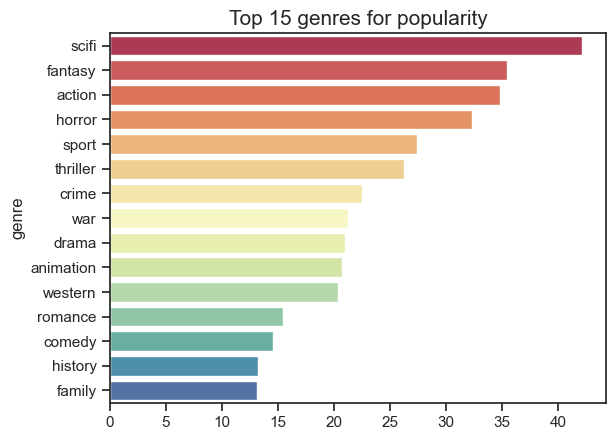

In [42]:
top15_genres = sns.barplot(x=top15_genres.values, y=top15_genres.index, palette= 'Spectral')
plt.title( "Top 15 genres for popularity", fontsize= '15')
plt.show()

In [43]:
# Exporting the visualization created
top15_genres.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top15_genres.png')))

In [44]:
# Group the DataFrame by country and calculate the mean rating
country_content = df_netflix.groupby("country")["id"].count()

# Sort the values in descending order and select the top 5
top5_countries = country_content.sort_values(ascending=False)[:5]

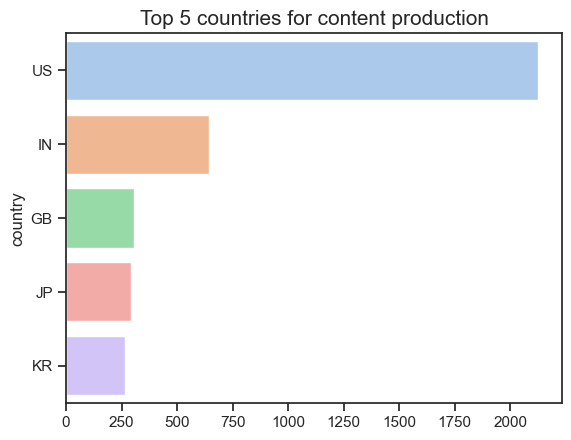

In [45]:
top5_countries = sns.barplot(x=top5_countries.values, y=top5_countries.index, palette= 'pastel')
plt.title( "Top 5 countries for content production", fontsize= '15')
plt.show()

In [46]:
# Exporting the visualization created
top5_countries.figure.savefig((os.path.join(path, 'Analysis','Visualizations', 'top5_countries.png')))

# 9. Defining hypotheses

H1: The most well-liked titles have also the greatest number of reviews

H2: The highest-rated titles are also the most popular ones